# Hierarquical Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Import IRIS datasets
iris = datasets.load_iris()

In [5]:
iris_data = pd.DataFrame(iris['data'])

In [7]:
iris_data.columns = iris.feature_names

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(iris_data)

In [10]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
# apply the PCA
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_scaled = pca_model.fit_transform(x_scaled)

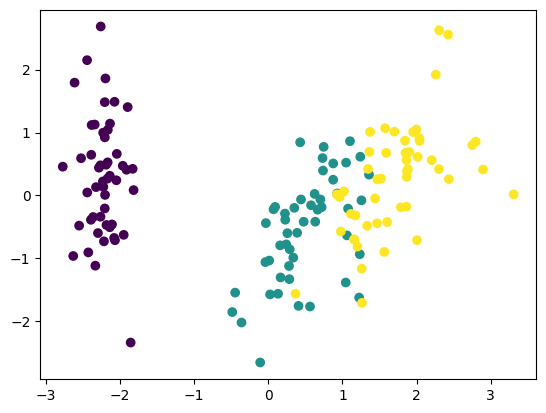

In [16]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=iris.target)

Text(0, 0.5, 'Euclidean Distance')

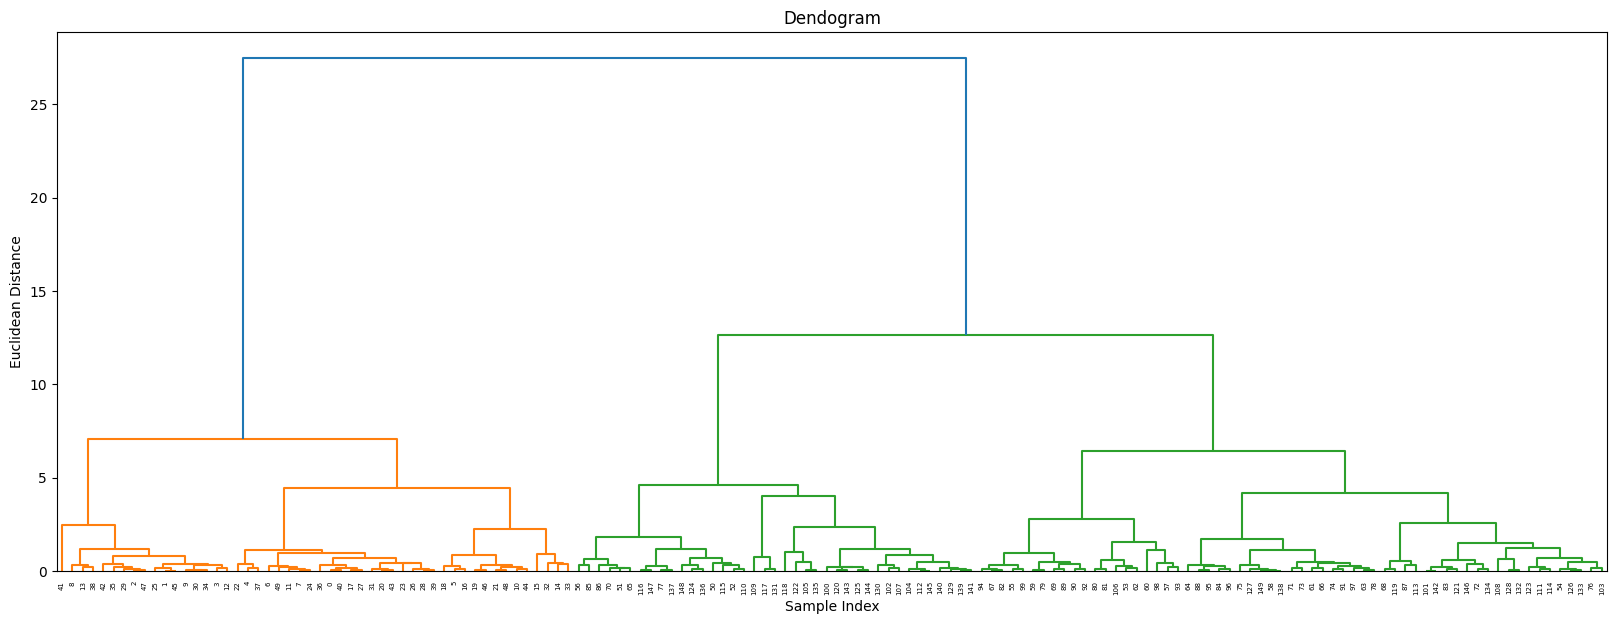

In [17]:
# Agglomerative clustering - to construct a dendogram
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20, 7))
plt.title("Dendograms")

# create a dendogram
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(
    n_clusters=2,
    metric="euclidean",
    linkage="ward"
)

cluster.fit(pca_scaled)

,"n_clusters n_clusters: int or None, default=2The number of clusters to find. It must be ``None`` if``distance_threshold`` is not ``None``.",2
,"metric metric: str or callable, default=""euclidean""Metric used to compute the linkage. Can be ""euclidean"", ""l1"", ""l2"",""manhattan"", ""cosine"", or ""precomputed"". If linkage is ""ward"", only""euclidean"" is accepted. If ""precomputed"", a distance matrix is neededas input for the fit method. If connectivity is None, linkage is""single"" and affinity is not ""precomputed"" any valid pairwise distancemetric can be assigned.For an example of agglomerative clustering with different metrics, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_clustering_metrics.py`... versionadded:: 1.2",'euclidean'
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the output of the computation of the tree.By default, no caching is done. If a string is given, it is thepath to the caching directory.",None
,"connectivity connectivity: array-like, sparse matrix, or callable, default=NoneConnectivity matrix. Defines for each sample the neighboringsamples following a given structure of the data.This can be a connectivity matrix itself or a callable that transformsthe data into a connectivity matrix, such as derived from`kneighbors_graph`. Default is ``None``, i.e, thehierarchical clustering algorithm is unstructured.For an example of connectivity matrix using:class:`~sklearn.neighbors.kneighbors_graph`, see:ref:`sphx_glr_auto_examples_cluster_plot_ward_structured_vs_unstructured.py`.",None
,"compute_full_tree compute_full_tree: 'auto' or bool, default='auto'Stop early the construction of the tree at ``n_clusters``. This isuseful to decrease computation time if the number of clusters is notsmall compared to the number of samples. This option is useful onlywhen specifying a connectivity matrix. Note also that when varying thenumber of clusters and using caching, it may be advantageous to computethe full tree. It must be ``True`` if ``distance_threshold`` is not``None``. By default `compute_full_tree` is ""auto"", which is equivalentto `True` when `distance_threshold` is not `None` or that `n_clusters`is inferior to the maximum between 100 or `0.02 * n_samples`.Otherwise, ""auto"" is equivalent to `False`.",'auto'
,"linkage linkage: {'ward', 'complete', 'average', 'single'}, default='ward'Which linkage criterion to use. The linkage criterion determines whichdistance to use between sets of observation. The algorithm will mergethe pairs of cluster that minimize this criterion.- 'ward' minimizes the variance of the clusters being merged.- 'average' uses the average of the distances of each observation of the two sets.- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.- 'single' uses the minimum of the distances between all observations of the two sets... versionadded:: 0.20 Added the 'single' optionFor examples comparing different `linkage` criteria, see:ref:`sphx_glr_auto_examples_cluster_plot_linkage_comparison.py`.",'ward'
,"distance_threshold distance_threshold: float, default=NoneThe linkage distance threshold at or above which clusters will not bemerged. If not ``None``, ``n_clusters`` must be ``None`` and``compute_full_tree`` must be ``True``... versionadded:: 0.21",None
,"compute_distances compute_distances: bool, default=FalseComputes distances between clusters even if `distance_threshold` is notused. This can be used to make dendrogram visualization, but introducesa computational and memory overhead... versionadded:: 0.24For an example of dendrogram visualization, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_dendrogram.py`.",False


In [20]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

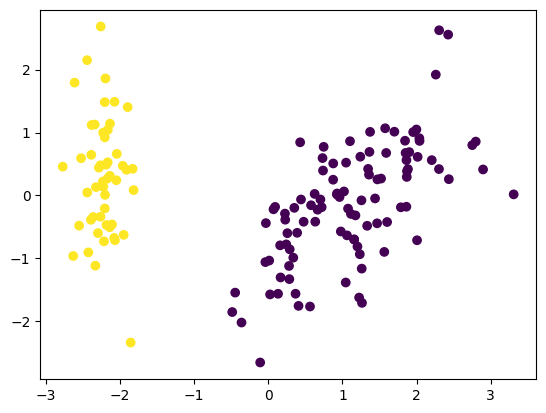

In [21]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)